# <span style="font-width:bold; font-size: 3rem; color:#1EB182;"> **Air Quality** </span><span style="font-width:bold; font-size: 3rem; color:#333;">- Part 04: Batch Inference</span>

## 🗒️ This notebook is divided into the following sections:

1. Download model and batch inference data
2. Make predictions, generate PNG for forecast
3. Store predictions in a monitoring feature group adn generate PNG for hindcast

## <span style='color:#ff5f27'> 📝 Imports

In [1]:
import sys
from pathlib import Path
import os

def is_google_colab() -> bool:
    if "google.colab" in str(get_ipython()):
        return True
    return False

def clone_repository() -> None:
    !git clone https://github.com/featurestorebook/mlfs-book.git
    %cd mlfs-book

def install_dependencies() -> None:
    !pip install --upgrade uv
    !uv pip install --all-extras --system --requirement pyproject.toml


if is_google_colab():
    clone_repository()
    install_dependencies()
    root_dir = str(Path().absolute())
    print("Google Colab environment")
else:
    root_dir = Path().absolute()
    # Strip ~/notebooks/ccfraud from PYTHON_PATH if notebook started in one of these subdirectories
    if root_dir.parts[-1:] == ('airquality',):
        root_dir = Path(*root_dir.parts[:-1])
    if root_dir.parts[-1:] == ('notebooks',):
        root_dir = Path(*root_dir.parts[:-1])
    root_dir = str(root_dir) 
    print("Local environment")

# Add the root directory to the `PYTHONPATH` to use the `recsys` Python module from the notebook.
if root_dir not in sys.path:
    sys.path.append(root_dir)
print(f"Added the following directory to the PYTHONPATH: {root_dir}")
    
# Read the API keys and configuration variables from the file <root_dir>/.env
from mlfs import config
if os.path.exists(f"{root_dir}/.env"):
    settings = config.HopsworksSettings(_env_file=f"{root_dir}/.env")

Local environment
Added the following directory to the PYTHONPATH: /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book
HopsworksSettings initialized!


In [2]:
import datetime
import pandas as pd
from xgboost import XGBRegressor
import hopsworks
from pathlib import Path
import json
from mlfs.airquality import util

In [3]:
today = datetime.datetime.now() - datetime.timedelta(0)
tomorrow = today + datetime.timedelta(days = 1)
today

datetime.datetime(2025, 11, 19, 3, 23, 54, 970169)

## <span style="color:#ff5f27;"> 📡 Connect to Hopsworks Feature Store </span>

2025-11-19 03:24:03,126 INFO: Initializing external client
2025-11-19 03:24:03,127 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-19 03:24:03,817 WARNING: UserWarning: The installed hopsworks client version 4.4.2 may not be compatible with the connected Hopsworks backend version 4.2.2. 
To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'



2025-11-19 03:24:04,523 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1301657
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.63s) 


Downloading: 0.000%|          | 0/507357 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/98484 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/17181 elapsed<00:00 remaining<?

2025-11-19 03:24:16,424 WARNING: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.



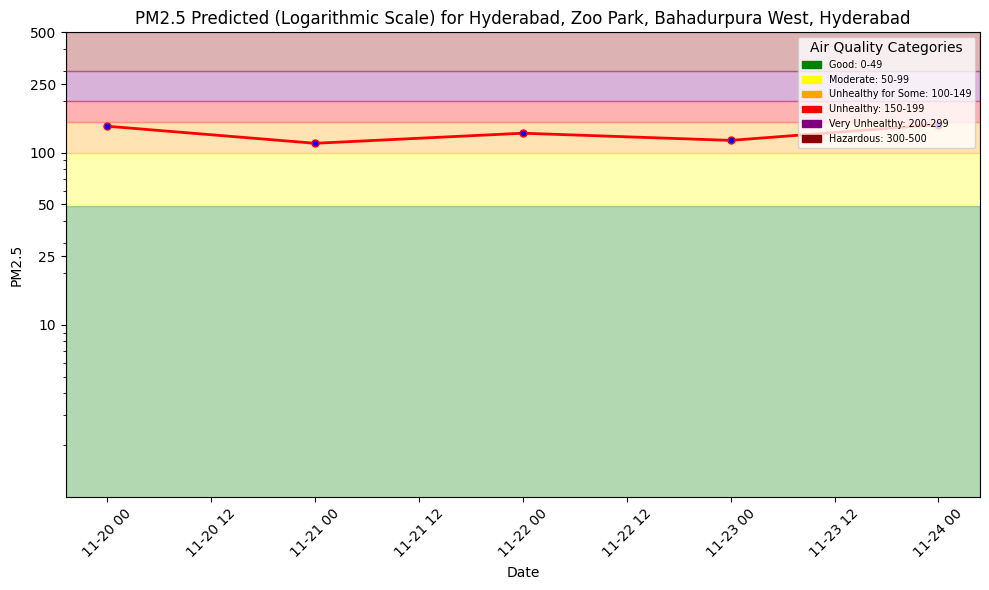

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:24:34,501 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:24:40,887 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:26:06,996 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:26:07,162 INFO: Waiting for log aggregation to finish.
2025-11-19 03:26:25,873 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.00s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.12s) 


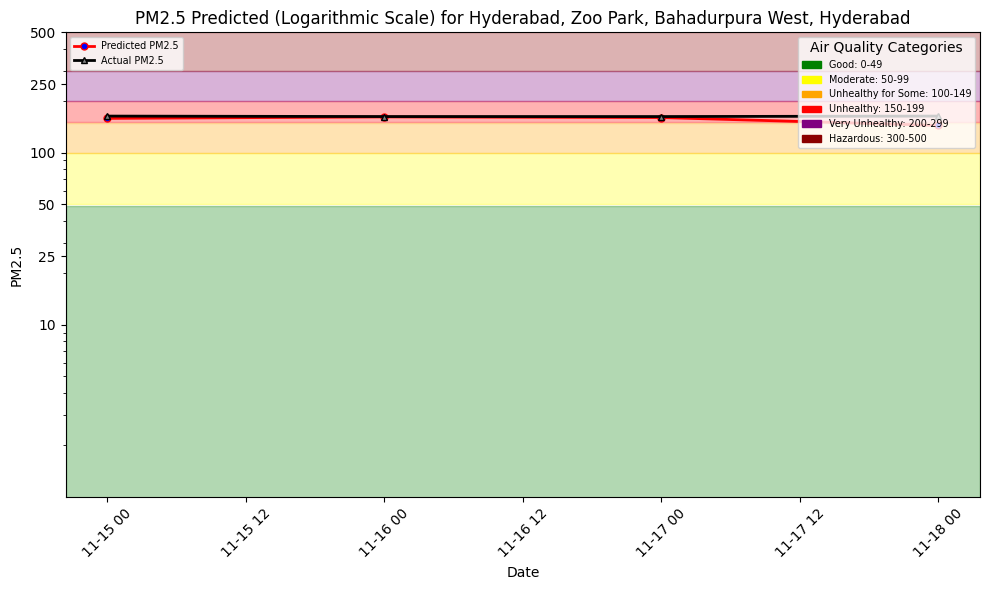

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_8677.png…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_8677.png…

Downloading: 0.000%|          | 0/494515 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/106498 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/17246 elapsed<00:00 remaining<?

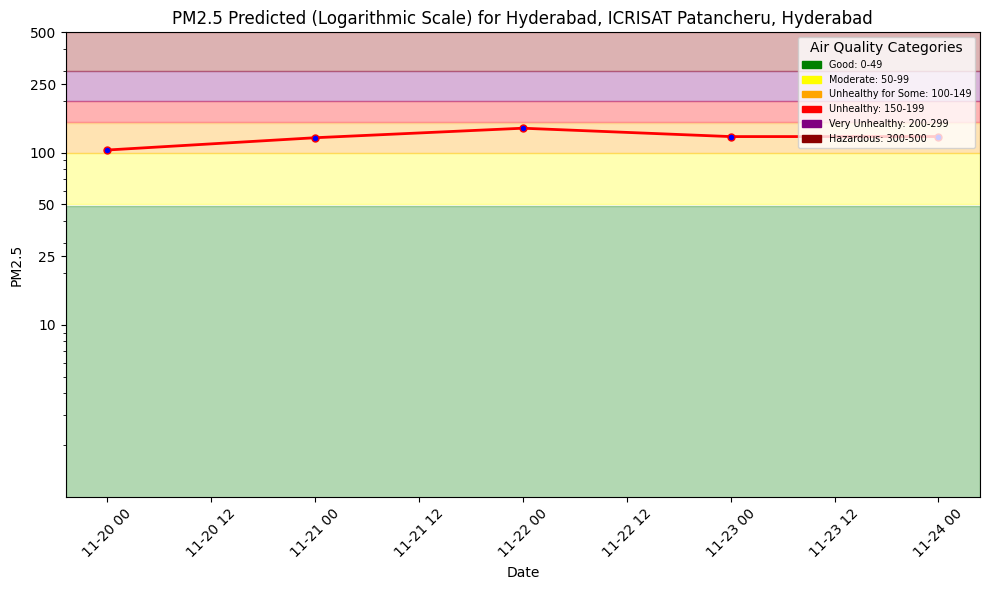

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:26:55,417 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:26:58,621 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:29:03,423 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:29:03,613 INFO: Waiting for log aggregation to finish.
2025-11-19 03:29:15,592 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.28s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.13s) 


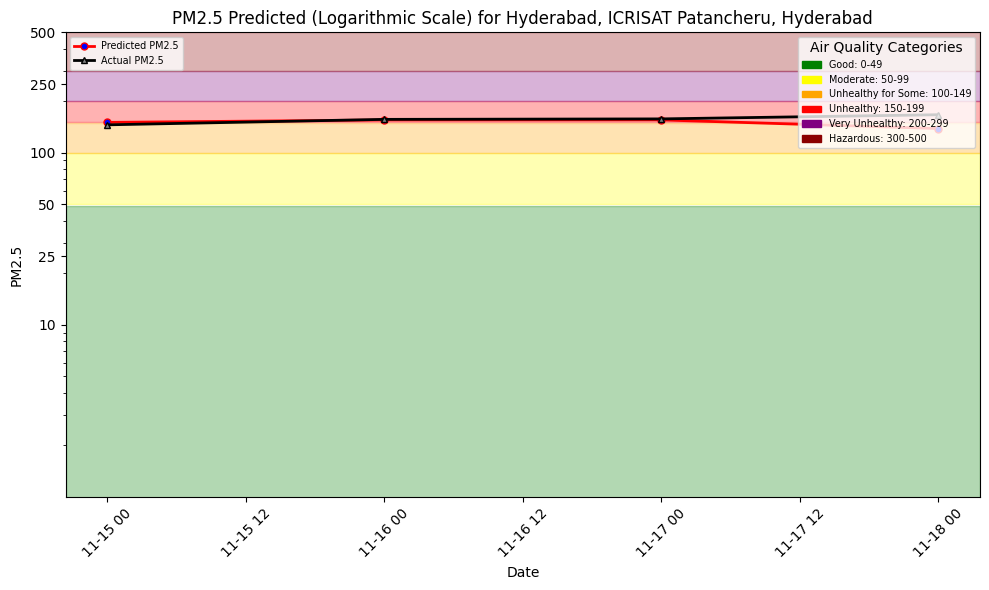

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_11305.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_11305.pn…

Downloading: 0.000%|          | 0/507721 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/97550 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/17250 elapsed<00:00 remaining<?

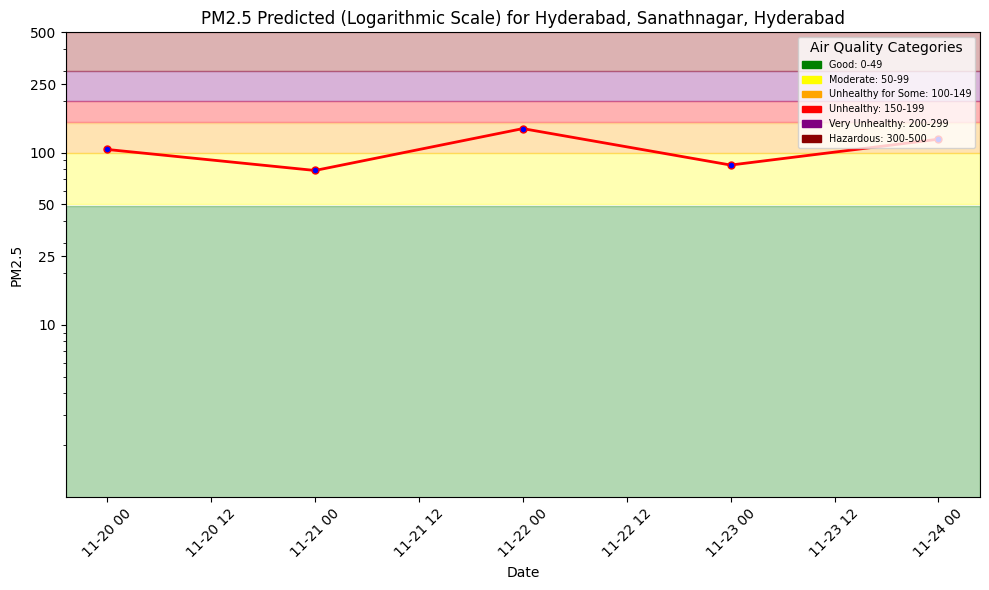

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:29:44,663 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:29:47,853 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:31:27,106 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:31:27,273 INFO: Waiting for log aggregation to finish.
2025-11-19 03:31:49,308 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.24s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.20s) 


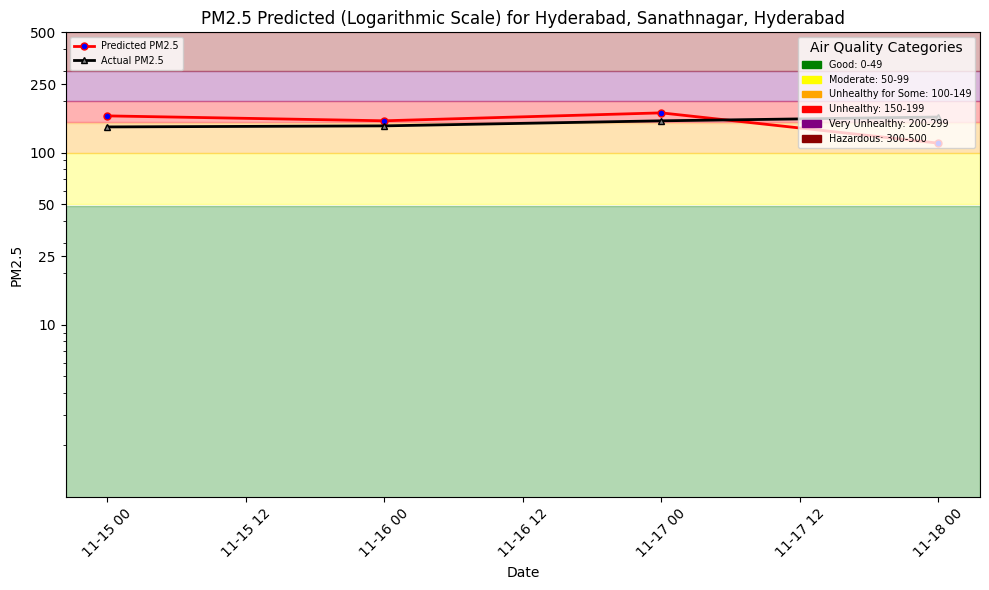

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_8182.png…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_8182.png…

Downloading: 0.000%|          | 0/492429 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/98809 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/16934 elapsed<00:00 remaining<?

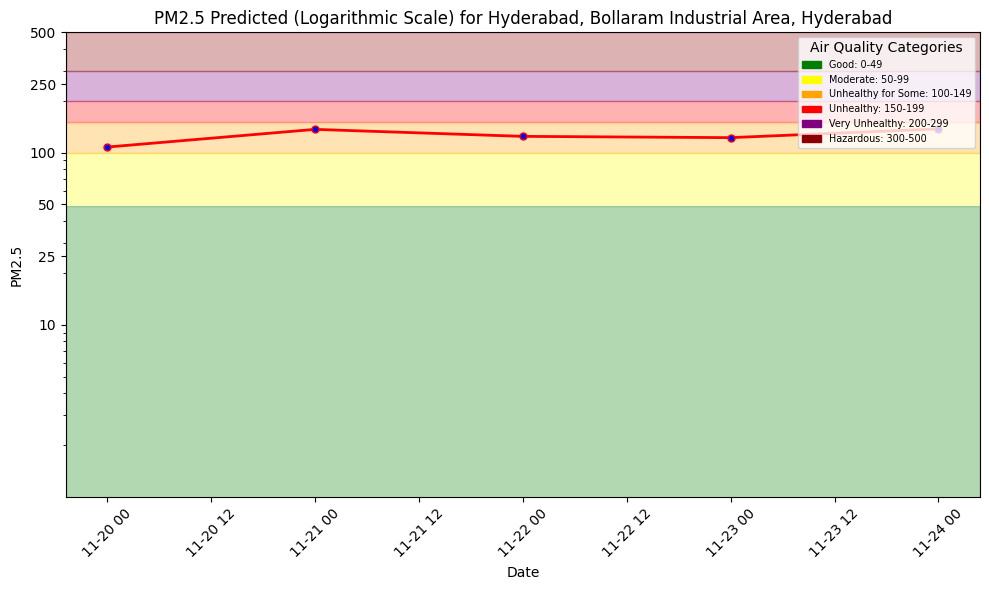

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:32:18,952 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:32:25,341 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:34:14,097 INFO: Waiting for execution to finish. Current state: SUCCEEDING. Final status: UNDEFINED
2025-11-19 03:34:23,696 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:34:23,854 INFO: Waiting for log aggregation to finish.
2025-11-19 03:34:46,010 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.09s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.19s) 
Finished: Read

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 4/4 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:35:08,153 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:35:14,569 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:36:47,281 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:36:47,449 INFO: Waiting for log aggregation to finish.
2025-11-19 03:37:06,076 INFO: Execution finished successfully.


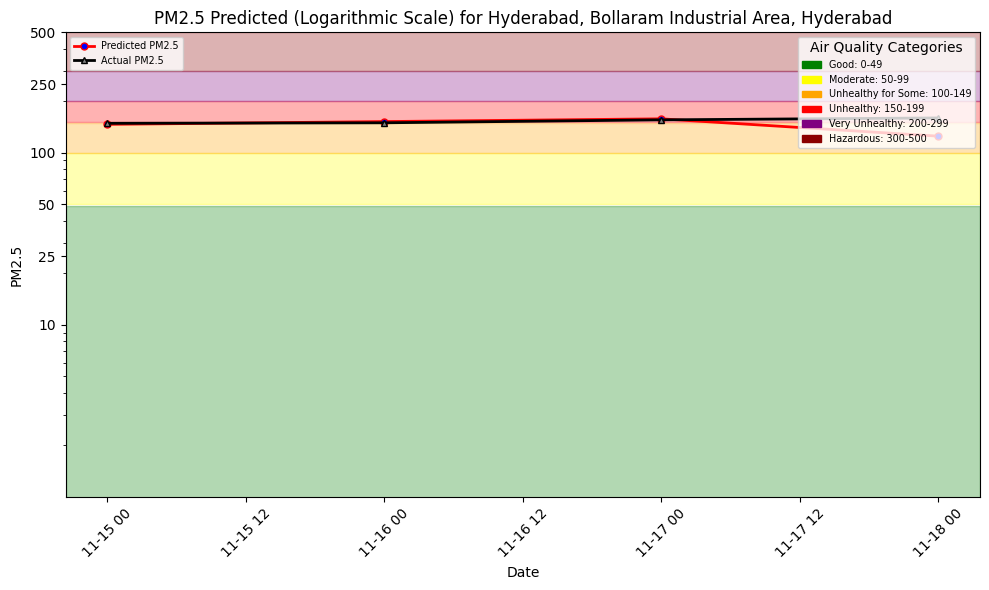

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_11295.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_11295.pn…

Downloading: 0.000%|          | 0/441310 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/82929 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/16577 elapsed<00:00 remaining<?

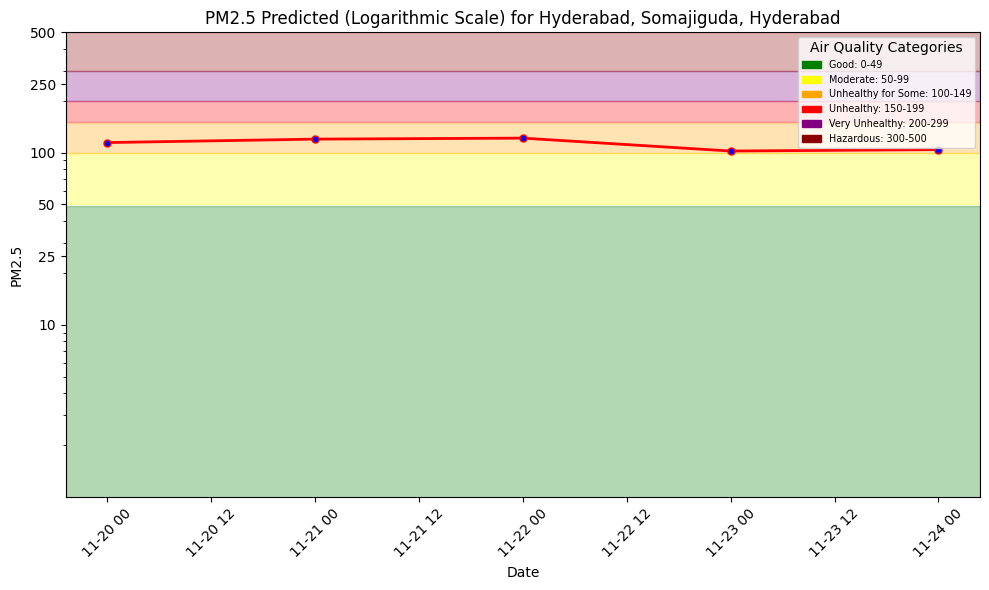

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:37:30,969 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:37:34,192 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:39:14,053 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:39:14,228 INFO: Waiting for log aggregation to finish.
2025-11-19 03:39:46,456 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.05s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.99s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.93s) 


Uploading Dataframe: 100.00% |██████████████████████████████| Rows 4/4 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:40:08,333 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:40:14,790 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:41:47,904 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:41:48,065 INFO: Waiting for log aggregation to finish.
2025-11-19 03:42:00,022 INFO: Execution finished successfully.


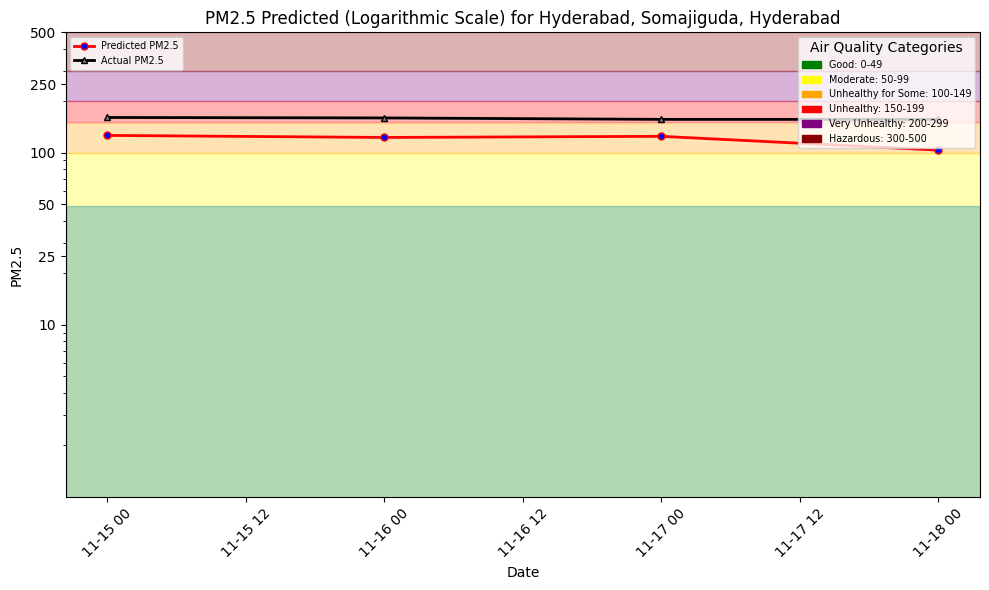

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_14125.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_14125.pn…

Downloading: 0.000%|          | 0/404652 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/81240 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/16856 elapsed<00:00 remaining<?

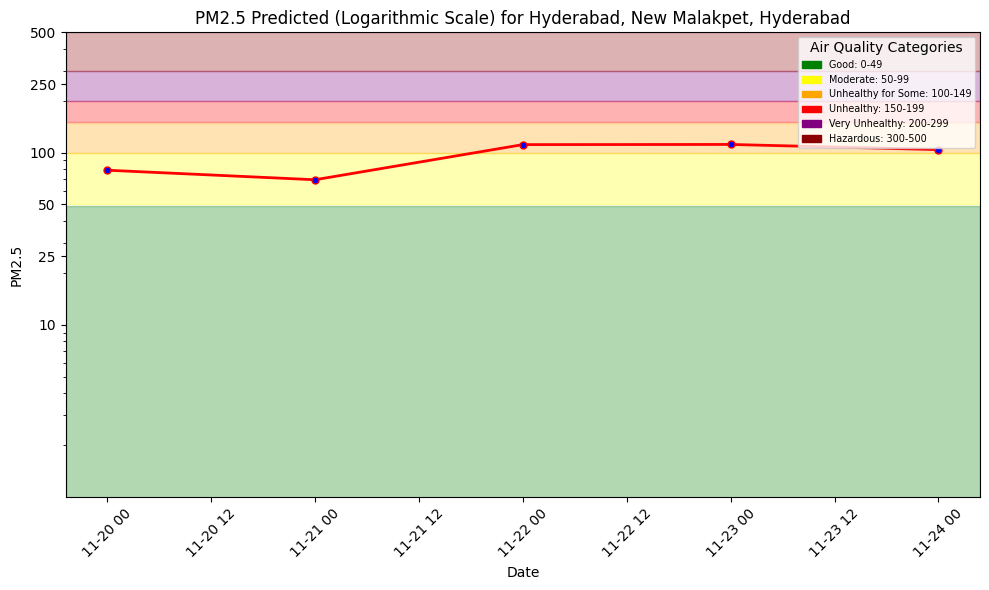

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:42:24,283 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:42:33,896 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:44:19,876 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:44:20,055 INFO: Waiting for log aggregation to finish.
2025-11-19 03:44:42,283 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.40s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.03s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.00s) 


Uploading Dataframe: 100.00% |██████████████████████████████| Rows 4/4 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:45:04,554 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:45:07,758 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:46:56,781 INFO: Waiting for execution to finish. Current state: SUCCEEDING. Final status: UNDEFINED
2025-11-19 03:47:03,217 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:47:03,380 INFO: Waiting for log aggregation to finish.
2025-11-19 03:47:22,191 INFO: Execution finished successfully.


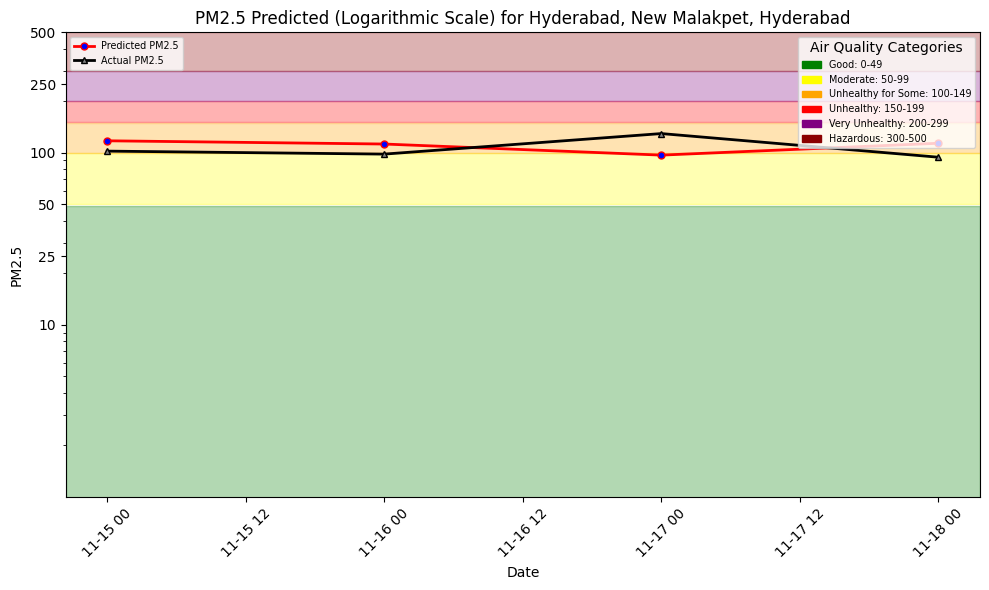

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_14135.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_14135.pn…

Downloading: 0.000%|          | 0/497039 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/110955 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/16833 elapsed<00:00 remaining<?

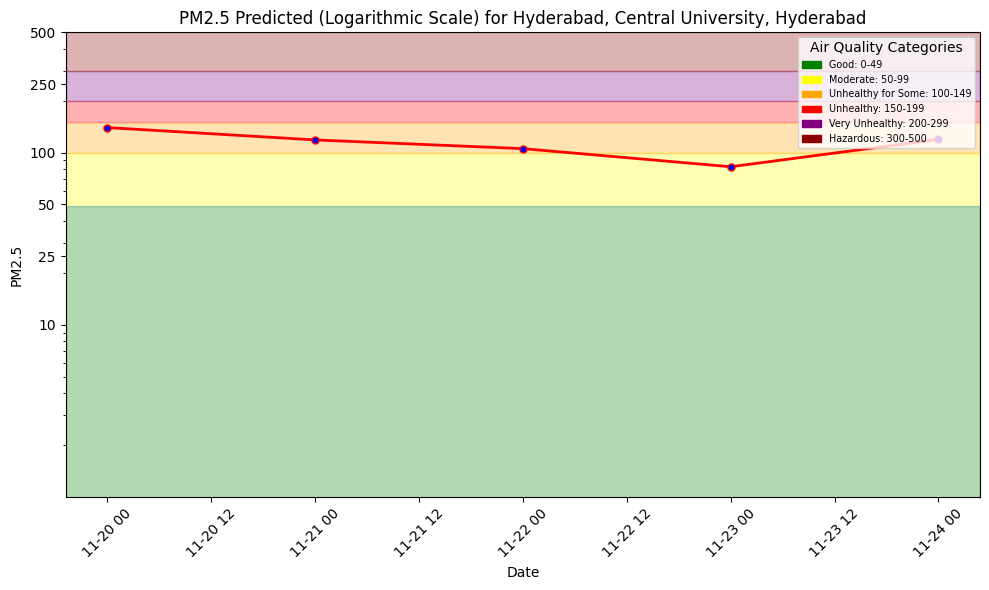

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:47:47,180 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:47:50,385 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:49:39,619 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:49:39,780 INFO: Waiting for log aggregation to finish.
2025-11-19 03:49:55,197 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.93s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.12s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.86s) 


Uploading Dataframe: 100.00% |██████████████████████████████| Rows 1/1 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:50:17,595 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:50:20,806 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:52:00,526 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:52:00,686 INFO: Waiting for log aggregation to finish.
2025-11-19 03:52:12,705 INFO: Execution finished successfully.


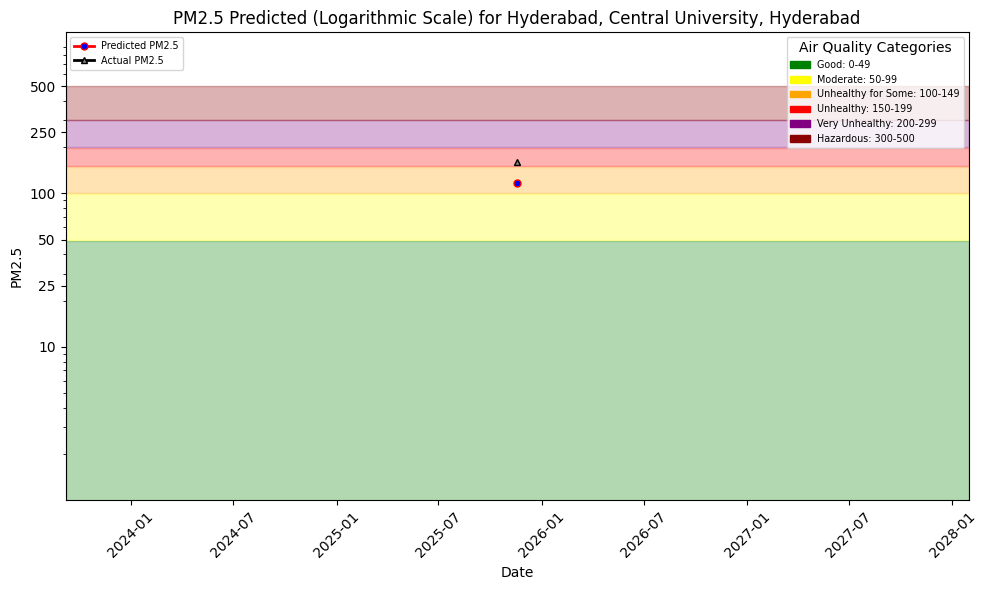

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_11284.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_11284.pn…

Downloading: 0.000%|          | 0/412828 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/78131 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/16671 elapsed<00:00 remaining<?

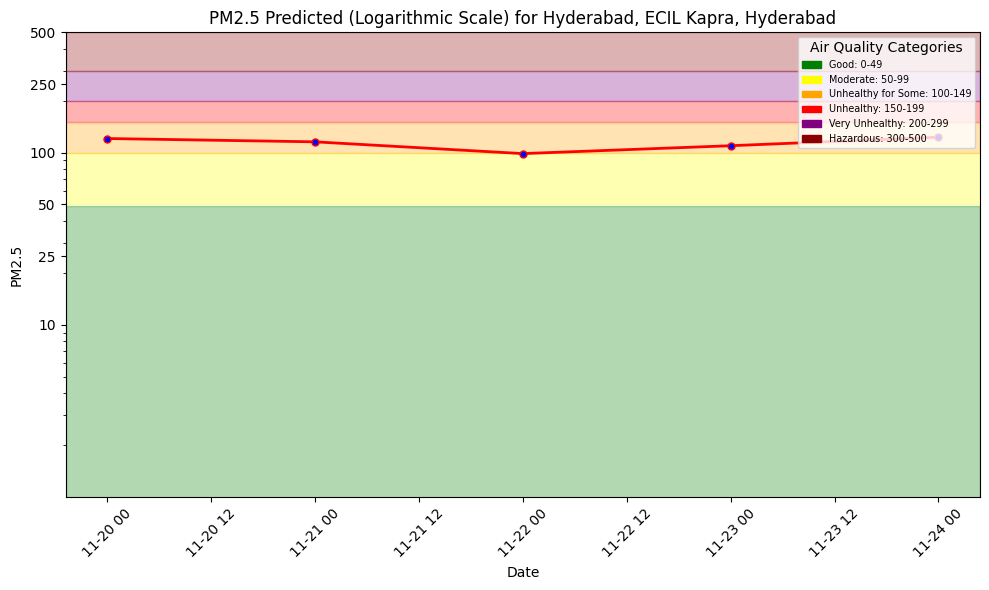

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:52:37,270 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:52:40,489 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:54:33,132 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:54:33,304 INFO: Waiting for log aggregation to finish.
2025-11-19 03:54:55,533 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.95s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.06s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.04s) 


Uploading Dataframe: 100.00% |██████████████████████████████| Rows 4/4 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:55:17,871 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:55:21,077 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:56:57,680 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:56:57,851 INFO: Waiting for log aggregation to finish.
2025-11-19 03:57:09,911 INFO: Execution finished successfully.


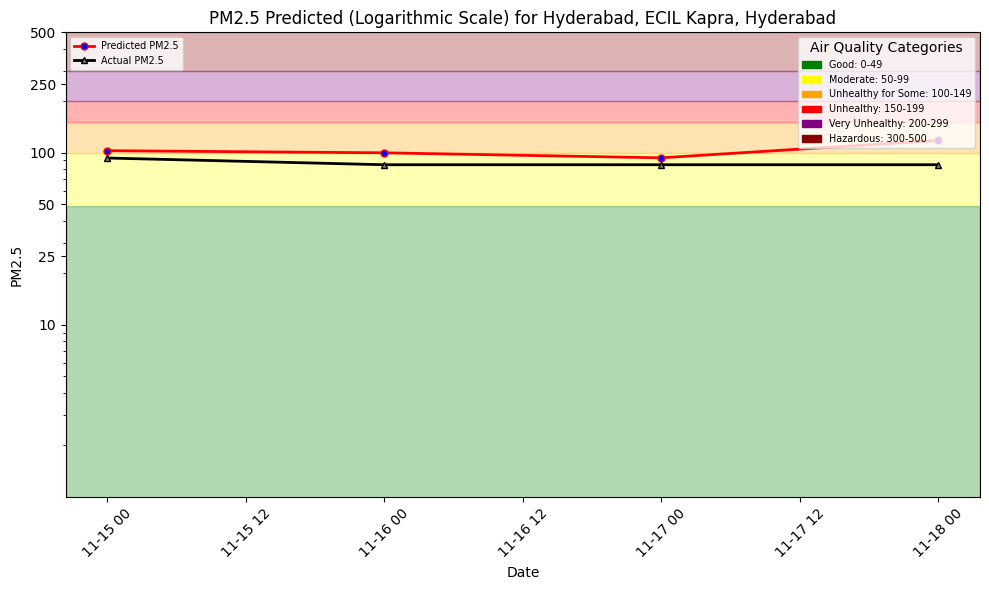

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_14156.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_14156.pn…

Downloading: 0.000%|          | 0/430568 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/71813 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/16577 elapsed<00:00 remaining<?

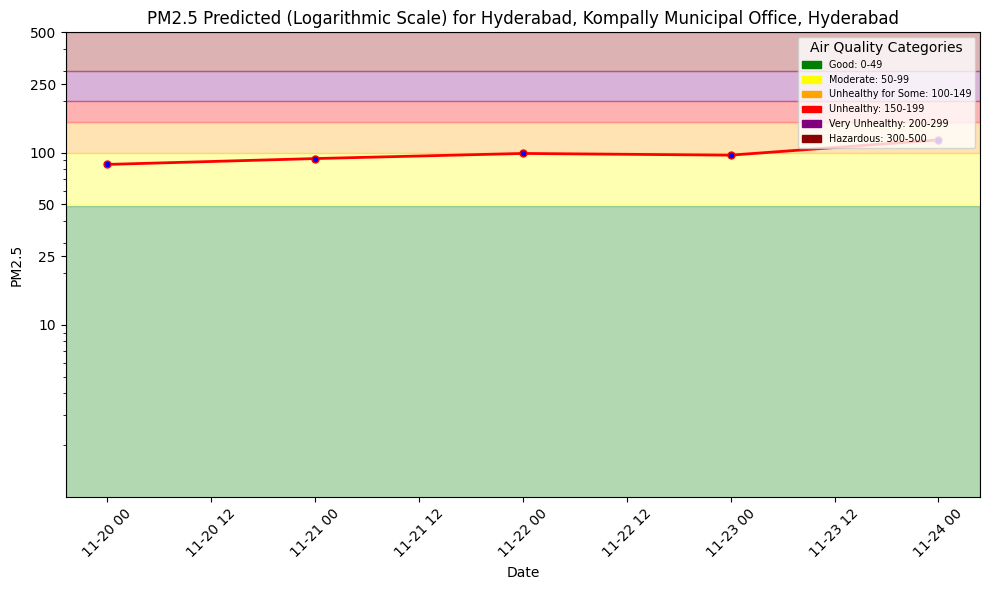

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 03:57:34,331 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 03:58:06,532 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 03:59:43,234 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 03:59:43,397 INFO: Waiting for log aggregation to finish.
2025-11-19 03:59:55,424 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.01s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.03s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.11s) 


Uploading Dataframe: 100.00% |██████████████████████████████| Rows 4/4 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 04:00:20,177 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 04:00:23,395 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 04:02:00,161 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 04:02:00,337 INFO: Waiting for log aggregation to finish.
2025-11-19 04:02:08,999 INFO: Execution finished successfully.


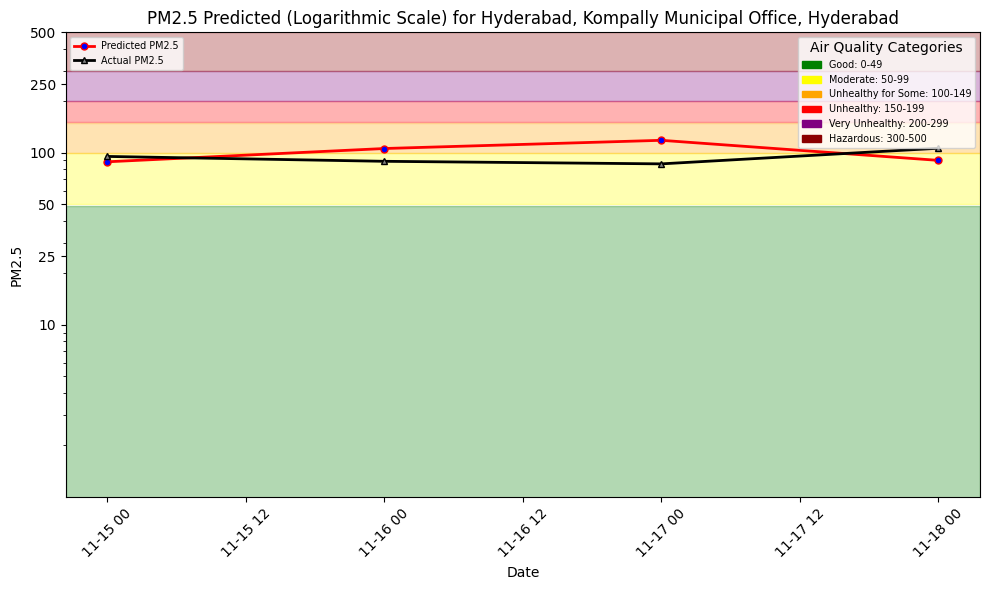

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_14149.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_14149.pn…

Downloading: 0.000%|          | 0/435927 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/72367 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/16537 elapsed<00:00 remaining<?

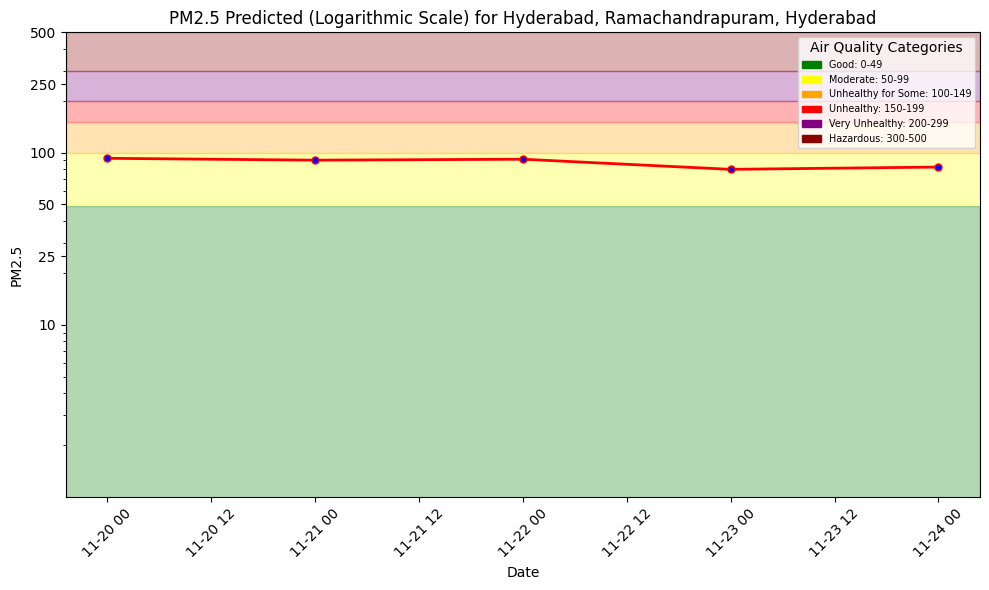

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 04:02:33,755 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 04:02:36,966 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 04:04:14,107 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 04:04:14,272 INFO: Waiting for log aggregation to finish.
2025-11-19 04:04:26,375 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.96s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.98s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.82s) 


Uploading Dataframe: 100.00% |██████████████████████████████| Rows 4/4 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 04:04:47,776 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 04:04:50,982 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 04:06:40,961 INFO: Waiting for execution to finish. Current state: SUCCEEDING. Final status: UNDEFINED
2025-11-19 04:06:44,228 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 04:06:44,390 INFO: Waiting for log aggregation to finish.
2025-11-19 04:07:13,390 INFO: Execution finished successfully.


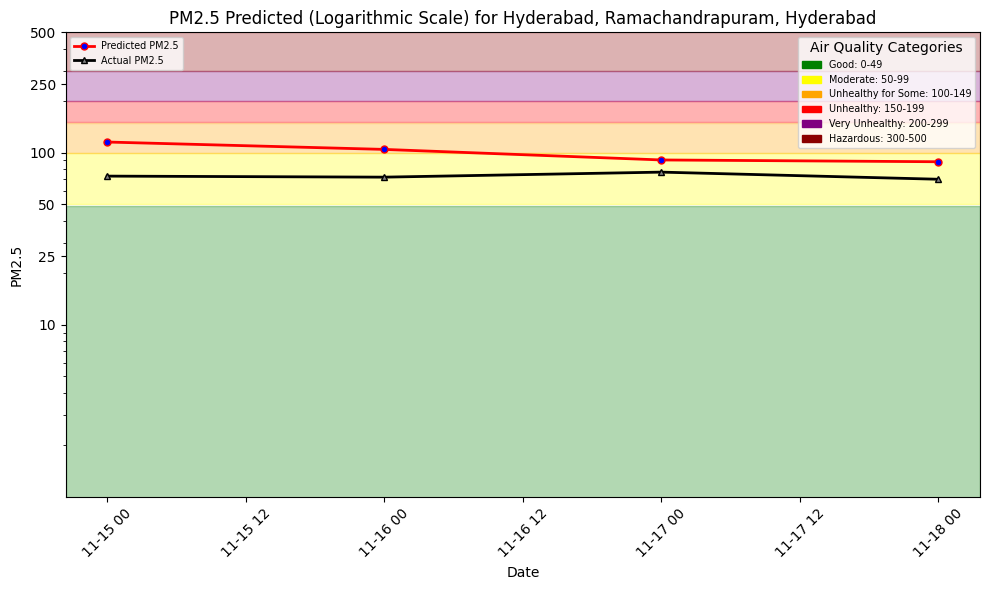

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_14140.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_14140.pn…

Downloading: 0.000%|          | 0/421437 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/72640 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/16811 elapsed<00:00 remaining<?

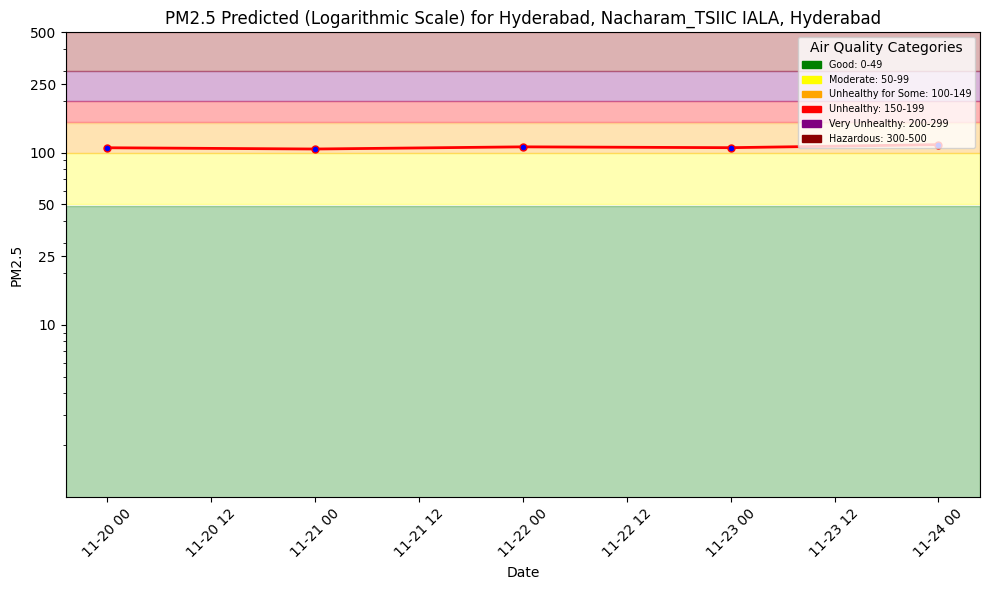

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 04:07:38,685 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 04:07:41,900 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 04:09:25,305 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 04:09:25,481 INFO: Waiting for log aggregation to finish.
2025-11-19 04:09:44,354 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.53s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.31s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.07s) 


Uploading Dataframe: 100.00% |██████████████████████████████| Rows 4/4 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 04:10:08,273 INFO: Waiting for execution to finish. Current state: INITIALIZING. Final status: UNDEFINED
2025-11-19 04:10:11,484 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 04:12:01,389 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 04:12:01,551 INFO: Waiting for log aggregation to finish.
2025-11-19 04:12:20,450 INFO: Execution finished successfully.


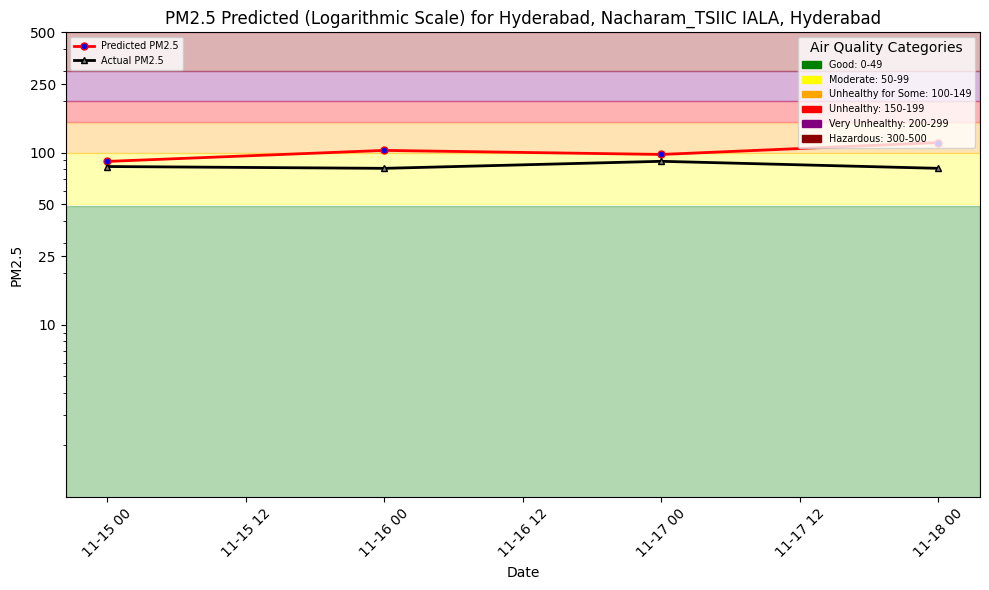

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_14155.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_14155.pn…

Downloading: 0.000%|          | 0/410911 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/73064 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/16632 elapsed<00:00 remaining<?

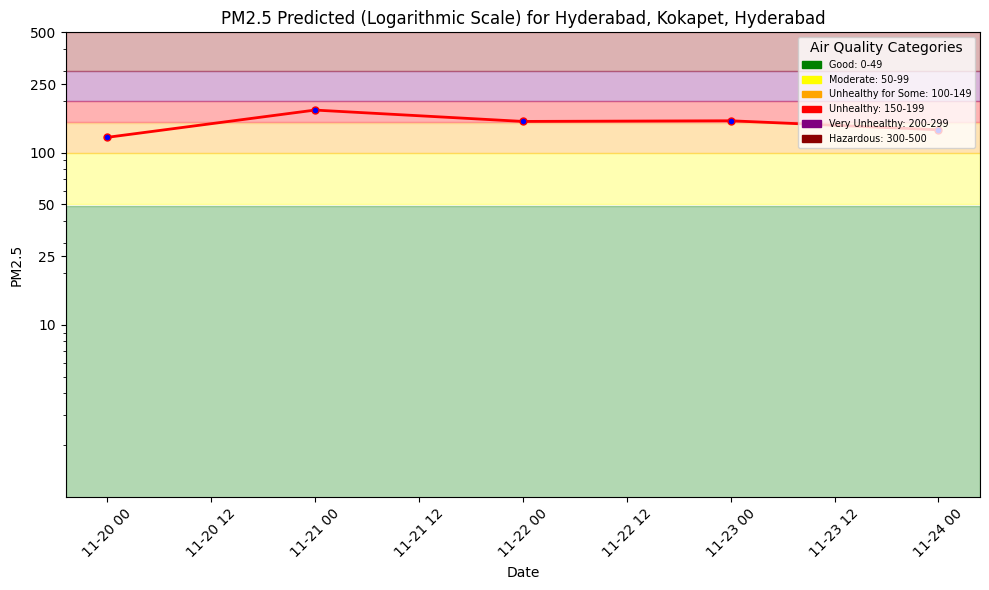

Uploading Dataframe: 100.00% |██████████████████████████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 04:12:45,431 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 04:12:48,671 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 04:14:29,346 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 04:14:29,511 INFO: Waiting for log aggregation to finish.
2025-11-19 04:14:51,793 INFO: Execution finished successfully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.09s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.05s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.92s) 


Uploading Dataframe: 100.00% |██████████████████████████████| Rows 4/4 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: aq_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1301657/jobs/named/aq_predictions_1_offline_fg_materialization/executions
2025-11-19 04:15:14,000 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-19 04:15:17,260 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-19 04:17:17,434 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-19 04:17:17,618 INFO: Waiting for log aggregation to finish.
2025-11-19 04:17:43,303 INFO: Execution finished successfully.


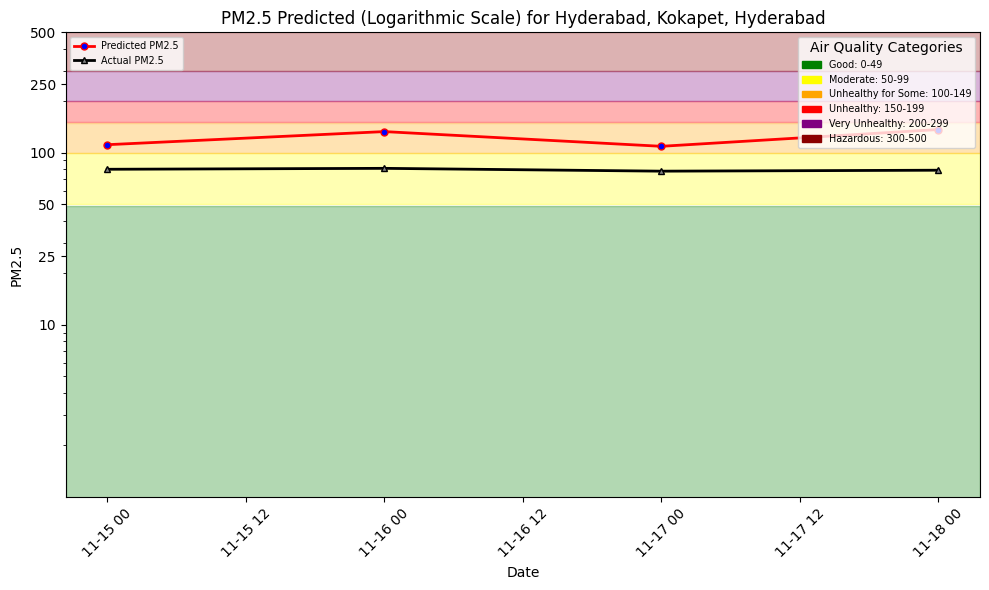

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_forecast_14127.pn…

Uploading /Users/lakshmisrinidhpachabotla/Desktop/mlfs-book/docs/air-quality/assets/img/pm25_hindcast_14127.pn…

See images in Hopsworks here: https://c.app.hopsworks.ai:443/p/1301657/settings/fb/path/Resources/airquality


In [4]:
import pandas as pd
from pathlib import Path
from xgboost import XGBRegressor

# 1. Connect to Hopsworks + load metadata
project = hopsworks.login()
fs = project.get_feature_store()
mr = project.get_model_registry()

SENSORS_CSV = Path(root_dir) / "data" / "hyderabad_sensors_pipeline.csv"
sensors_df = pd.read_csv(SENSORS_CSV)

# shared AQICN key (if you still need it later)
AQICN_API_KEY = hopsworks.get_secrets_api().get_secret("AQICN_API_KEY").value

# shared weather forecast read once
weather_fg = fs.get_feature_group(name="weather", version=1)
batch_weather = weather_fg.filter(weather_fg.date >= today).read()

# monitoring feature group + datasets folder
monitor_fg = fs.get_or_create_feature_group(
    name="aq_predictions",
    description="Air Quality prediction monitoring",
    version=1,
    primary_key=["city", "street", "date", "days_before_forecast_day"],
    event_time="date",
)

dataset_api = project.get_dataset_api()
if not dataset_api.exists("Resources/airquality"):
    dataset_api.mkdir("Resources/airquality")

# 2. Loop through each sensor and run inference + monitoring
for _, sensor in sensors_df.iterrows():
    city = sensor["city"]
    country = sensor["country"]
    street = sensor["street_display_name"]
    feature_group_name = sensor["feature_group_name"]
    model_name = sensor["model_name"]
    sensor_slug = sensor["sensor_id"]

    # download/load the sensor-specific model
    retrieved_model = mr.get_model(name=model_name, version=1)
    if retrieved_model is None:
        print(f"Model {model_name} not found, skipping {street}")
        continue
    saved_model_dir = retrieved_model.download()

    xgb_model = XGBRegressor()
    xgb_model.load_model(saved_model_dir + "/model.json")

    # run predictions using the shared weather forecast
    preds_df = batch_weather.copy()
    preds_df["predicted_pm25"] = xgb_model.predict(
        preds_df[
            [
                "temperature_2m_mean",
                "precipitation_sum",
                "wind_speed_10m_max",
                "wind_direction_10m_dominant",
            ]
        ]
    )
    preds_df["street"] = street
    preds_df["city"] = city
    preds_df["country"] = country
    preds_df["days_before_forecast_day"] = range(1, len(preds_df) + 1)
    preds_df = preds_df.sort_values(by="date")

    # forecast PNG
    pred_file_path = f"{root_dir}/docs/air-quality/assets/img/pm25_forecast_{sensor_slug}.png"
    plt = util.plot_air_quality_forecast(city, street, preds_df, pred_file_path)
    plt.show()

    # insert predictions into monitoring FG
    monitor_fg.insert(preds_df, wait=True)

    # hindcast: compare 1-day-ahead predictions vs actuals
    monitoring_df = (
        monitor_fg.filter(monitor_fg.days_before_forecast_day == 1)
        .filter(monitor_fg.street == street)
        .read()
    )
    air_quality_fg = fs.get_feature_group(name=feature_group_name, version=1)
    air_quality_df = air_quality_fg.read()

    hindcast_df = (
        pd.merge(
            monitoring_df[["date", "predicted_pm25"]],
            air_quality_df[["date", "pm25"]],
            on="date",
        )
        .sort_values(by="date")
    )
    if len(hindcast_df) == 0:
        hindcast_df = util.backfill_predictions_for_monitoring(
            weather_fg, air_quality_df, monitor_fg, xgb_model
        )

    hindcast_file_path = (
        f"{root_dir}/docs/air-quality/assets/img/pm25_hindcast_{sensor_slug}.png"
    )
    plt = util.plot_air_quality_forecast(
        city, street, hindcast_df, hindcast_file_path, hindcast=True
    )
    plt.show()

    # upload PNGs to Hopsworks dataset
    str_today = today.strftime("%Y-%m-%d")
    dataset_api.upload(
        pred_file_path,
        f"Resources/airquality/{city}_{street}_{str_today}",
        overwrite=True,
    )
    dataset_api.upload(
        hindcast_file_path,
        f"Resources/airquality/{city}_{street}_{str_today}",
        overwrite=True,
    )

print(f"See images in Hopsworks here: {project.get_url()}/settings/fb/path/Resources/airquality")


### Plot the Hindcast comparing predicted with forecasted values (1-day prior forecast)

__This graph will be empty to begin with - this is normal.__

After a few days of predictions and observations, you will get data points in this graph.

### Upload the prediction and hindcast dashboards (png files) to Hopsworks


---